In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp

# Miedź

In [121]:
copper = pd.read_csv('data/copper.csv')
copper

,Date,Close/Last,Volume,Open,High,Low
0,03/28/2023,4.0855,75067,4.0970,4.1130,4.0590
1,03/27/2023,4.0785,65558,4.0750,4.1020,4.0235
2,03/24/2023,4.0750,82229,4.1015,4.1485,4.0505
3,03/23/2023,4.1235,77824,4.0430,4.1265,4.0225
4,03/22/2023,4.0445,77119,4.0015,4.1075,3.9715
...,...,...,...,...,...,...
1254,04/05/2018,3.0745,107499,3.0285,3.0880,3.0135
1255,04/04/2018,3.0105,137745,3.0670,3.0695,2.9700
1256,04/03/2018,3.0635,109250,3.0445,3.0695,3.0385
1257,04/02/2018,3.0500,68976,3.0480,3.0725,3.0370


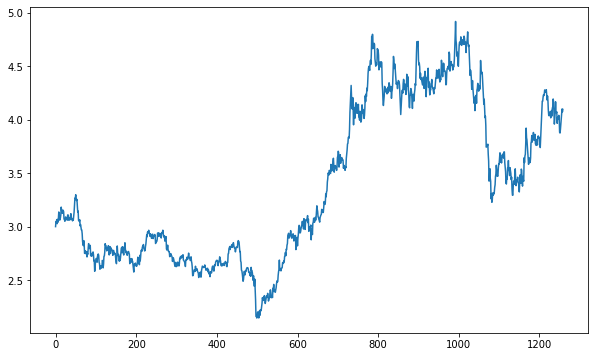

In [122]:
Y = np.array(copper.Open.values[::-1])

plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

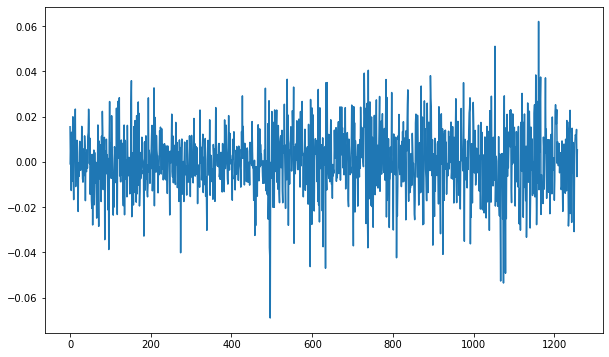

In [123]:
X = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X)
plt.show()

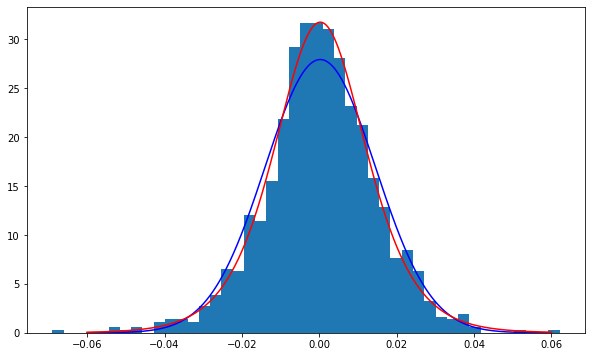

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(X, bins=45, density=True)
xs = np.linspace(-0.06, 0.06, 1000)
plt.plot(xs, sp.norm.pdf(xs, np.mean(X), np.std(X)), c='blue')
plt.plot(xs, sp.logistic.pdf(xs, np.mean(X), np.sqrt(3)/np.pi * np.std(X)), c='red')
plt.show()

In [150]:
sp.kstest(X, 'logistic', [np.mean(X), np.sqrt(3)/np.pi * np.std(X)])

KstestResult(statistic=0.017299896308711815, pvalue=0.8392824194992375)

In [147]:
N = np.random.normal(5, 3, 1000)
sp.kstest(N, 'norm', [5, 3])

KstestResult(statistic=0.026590309759772723, pvalue=0.4712982564075654)

# Aluminium

In [45]:
aluminium = pd.read_csv('data/aluminium.csv')
aluminium

,Date,Close/Last,Volume,Open,High,Low
0,04/12/2023,2328.50,1205.0,2311.00,2335.0,2293.50
1,04/11/2023,2306.75,1979.0,2333.75,2335.5,2302.50
2,04/10/2023,2348.00,2215.0,2348.00,2348.0,2348.00
3,04/06/2023,2338.25,1373.0,2355.00,2359.5,2329.25
4,04/05/2023,2370.00,NaN,2370.00,2370.0,2370.00
...,...,...,...,...,...,...
1254,04/19/2018,2300.00,NaN,2300.00,2300.0,2300.00
1255,04/18/2018,2300.00,NaN,2300.00,2300.0,2300.00
1256,04/17/2018,2300.00,NaN,2300.00,2300.0,2300.00
1257,04/16/2018,2300.00,NaN,2300.00,2300.0,2300.00


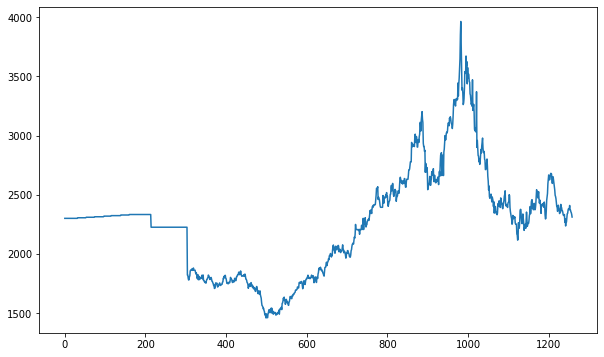

In [46]:
Y = np.array(aluminium.Open.values[::-1])

plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

In [47]:
idx = aluminium.index[aluminium['Date'] == '07/01/2019'].tolist()[0]
aluminium = aluminium.drop(aluminium.index[idx:1259])
Y = np.array(aluminium.Open.values[::-1])

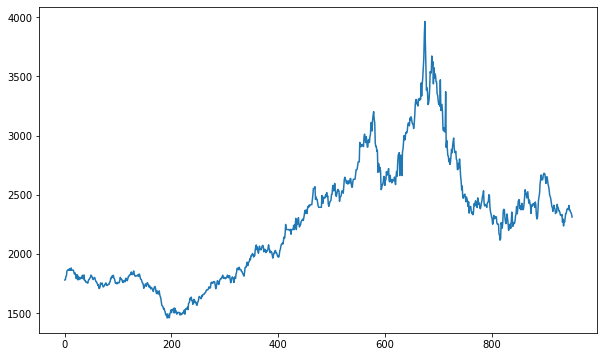

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

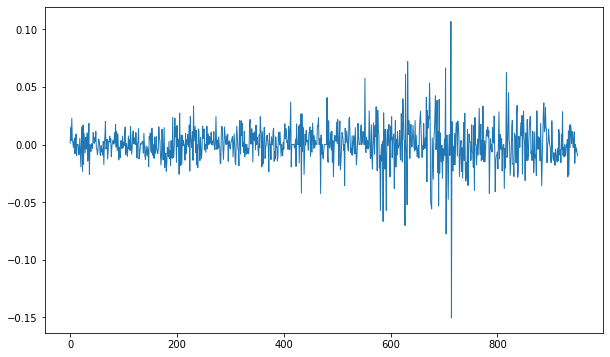

In [116]:
X = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X, lw=1)
plt.show()

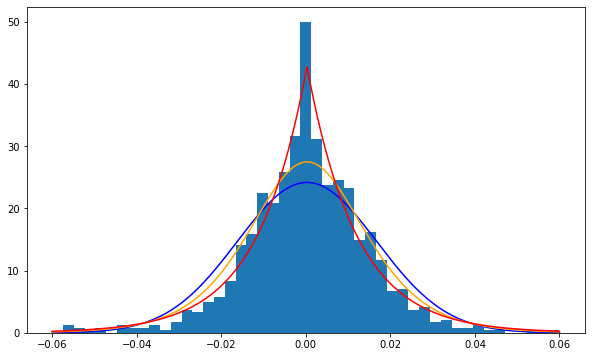

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(X, bins=47, density=True, range=(-0.06, 0.06))
xs = np.linspace(-0.06, 0.06, 1000)
plt.plot(xs, sp.norm.pdf(xs, np.mean(X), np.std(X)), c='blue')
plt.plot(xs, sp.logistic.pdf(xs, np.mean(X), np.sqrt(3)/np.pi * np.std(X)), c='orange')
plt.plot(xs, sp.laplace.pdf(xs, np.mean(X), 1/np.sqrt(2) * np.std(X)), c='red')
plt.show()

In [51]:
import numpy as np
from scipy.stats import boxcox
from scipy.special import inv_boxcox

Y_, lambda_ = boxcox(Y)

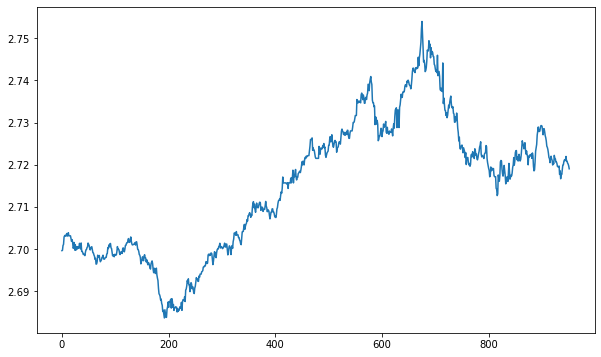

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(Y_)
plt.show()

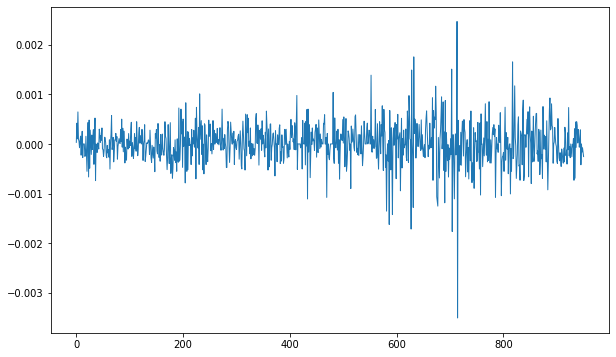

In [117]:
X_ = np.log(Y_[1:] / Y_[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X_, lw=1)
plt.show()

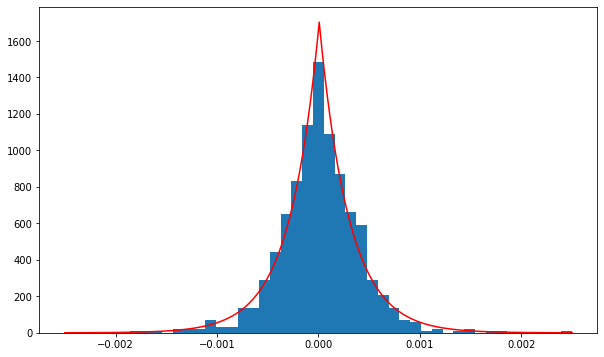

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(X_, bins=47, density=True, range=(-0.0025, 0.0025))
xs = np.linspace(-0.0025, 0.0025, 1000)
#plt.plot(xs, sp.norm.pdf(xs, np.mean(X_), np.std(X_)), c='blue')
#plt.plot(xs, sp.logistic.pdf(xs, np.mean(X_), np.sqrt(3)/np.pi * np.std(X_)), c='red')
plt.plot(xs, sp.laplace.pdf(xs, np.mean(X_), 1/np.sqrt(2) * np.std(X_)), c='red')
plt.show()

In [149]:
sp.kstest(X_, 'laplace', [np.mean(X_), 1/np.sqrt(2) * np.std(X_)])

KstestResult(statistic=0.029911487957002825, pvalue=0.35552465578415693)